# Import libraries

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

# Read Dataset
<a href = 'https://www.kaggle.com/mokar2001/house-price-tehran-iran'>Link to the dataset in Kaggle.</a>
- متراژ خانه به متر (Area)
- تعداد اتاق خواب (Room)
- پارکینگ دارد یا خیر (Parking)
- انباری دارد یا خیر (Warehouse)
- آسانسور دارد یا خیر (Elevator)
- آدرس حدودی در تهران (Address)
- قیمت به تومان (Price)
- قیمت به دلار (Price(USD))

In [157]:
house_price_df = pd.read_csv('housePrice.csv')
print(f"shape of dataset: {house_price_df.shape}")
house_price_df.head()

shape of dataset: (3479, 8)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [158]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


# Preprocessing

In [159]:
house_price_df['Area'] = pd.to_numeric(house_price_df['Area'], errors='coerce')

In [160]:
house_price_df.dropna(inplace = True)
house_price_df.reset_index(drop = True, inplace = True)
print(f"Shape of dataset: {house_price_df.shape}") # 29 rows with NaN values deleted.

Shape of dataset: (3450, 8)


In [161]:
house_price = house_price_df[['Area','Room','Parking','Warehouse','Elevator','Address','Price']] 

le = LabelEncoder()
house_price['Address'] = le.fit_transform(house_price['Address'].values)

boolean_features = ['Parking','Warehouse','Elevator']
house_price[boolean_features] = house_price[boolean_features].astype('int64')

house_price.head()

C:\Users\Alireza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Alireza\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,156,1.850000e+09
1,60.0,1,1,1,1,156,1.850000e+09
2,79.0,2,1,1,1,117,5.500000e+08
3,95.0,2,1,1,1,152,9.025000e+08
4,123.0,2,1,1,1,150,7.000000e+09


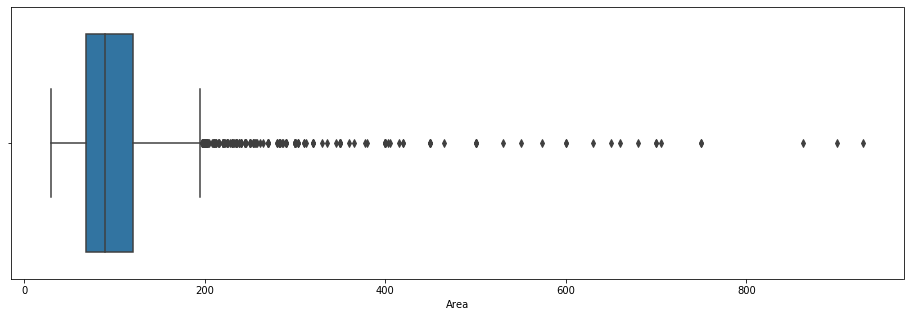

In [162]:
plt.figure(figsize = (16,5))
sns.boxplot(x = house_price['Area'])

In [163]:
# Removing the outliers.
# By removing area values higher than 200 better data can be obtained.

area_upper_limit = np.where(house_price['Area']>200)
print(f"Number of data that removed: {len(house_price.iloc[area_upper_limit])}")

Number of data that removed: 191


In [164]:
house_price_new = house_price.drop(area_upper_limit[0])
house_price_new.reset_index(drop = True, inplace = True)
print(f"Shape of new dataset: {house_price_new.shape}")

Shape of new dataset: (3259, 7)


Upper limit: 11152500000.0


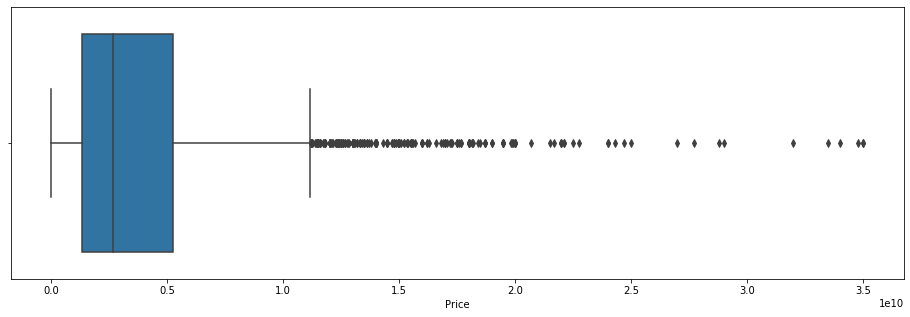

In [165]:
plt.figure(figsize = (16,5))
sns.boxplot(x = house_price_new['Price'])
Q1 = np.percentile(house_price_new['Price'], 25)
Q3 = np.percentile(house_price_new['Price'], 75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
print(f"Upper limit: {upper}")

In [166]:
# Removing the outliers.
# By removing area values higher than 200 better data can be obtained.

price_upper_limit = np.where(house_price_new['Price']>upper)
print(f"Number of data that removed: {len(house_price_new.iloc[price_upper_limit])}")

Number of data that removed: 229


In [167]:
house_price_final = house_price_new.drop(price_upper_limit[0])
house_price_final.reset_index(drop = True, inplace = True)
print(f"Shape of FINAL dataset: {house_price_final.shape}")

Shape of FINAL dataset: (3030, 7)


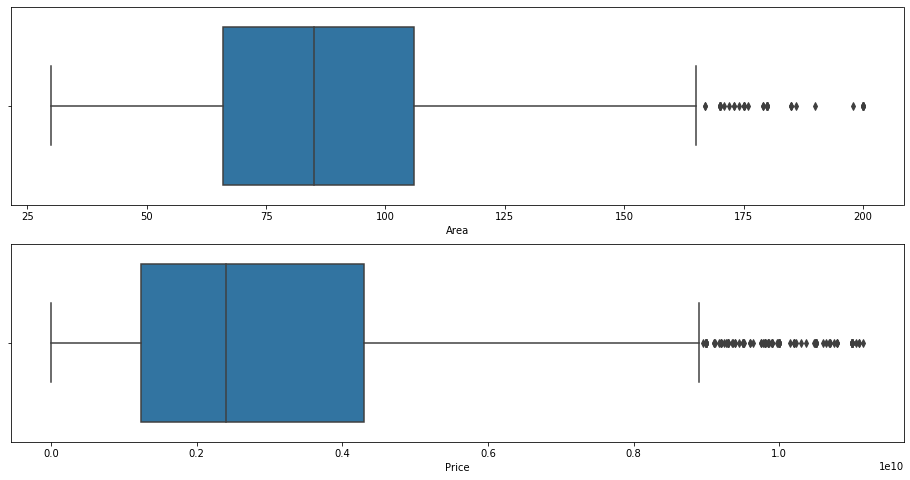

In [168]:
fig, ax = plt.subplots(2,1,figsize = (16,8))
sns.boxplot(ax = ax[0], x = house_price_final['Area'])
sns.boxplot(ax = ax[1], x = house_price_final['Price'])

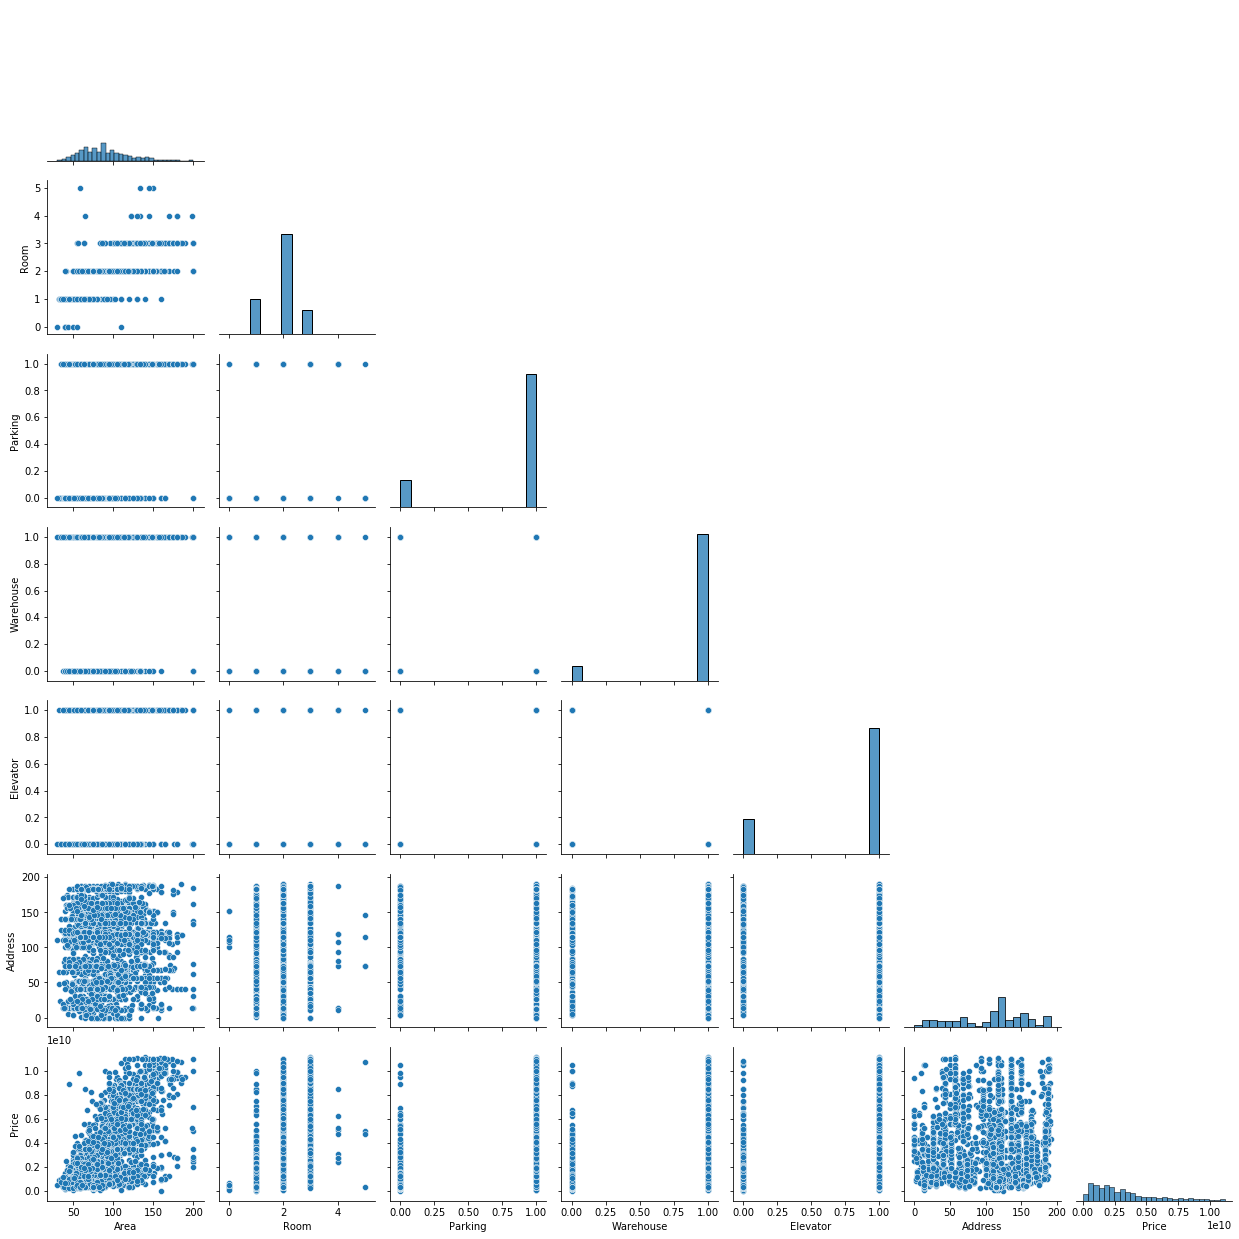

In [169]:
sns.pairplot(house_price_final, corner = True)

In [170]:
X = house_price_final[['Area','Room','Parking','Warehouse','Elevator','Address']]
y = house_price_final[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2424, 6)
shape of y train: (2424, 1)
shape of x test: (606, 6)
shape of y train: (606, 1)


# Model

In [171]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [172]:
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"Explained variance regression score: {lr.score(X_test, y_test):.2f}")

MSE : 3.270322256541935e+18
Explained variance regression score: 0.46
